# get_edge_colors_by_attr

Get colors based on edge attribute values.

In [1]:
# Software for Complex Networks. NetworkX has 12 repositories available. Follow their code on GitHub.
import networkx as nx

# OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks
import osmnx as ox

ox.config(use_cache=True, log_console=False)
ox.__version__

'1.1.2'

/Users/junhyun/.pyenv/versions/3.8.5/envs/openstreetmap/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


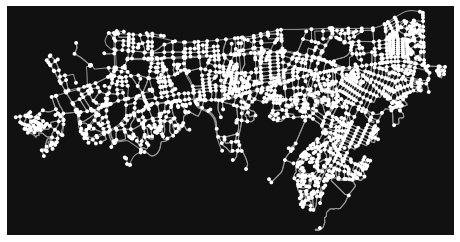

In [2]:
query = '중구, 서울특별시, 대한민국'
network_type = 'drive' # "all_private", "all", "bike", "drive", "drive_service", "walk"

# Create graph from OSM within the boundaries of some geocodable place(s).
G = ox.graph_from_place(query, network_type=network_type)

# Plot a graph.
fig, ax = ox.plot_graph(G)

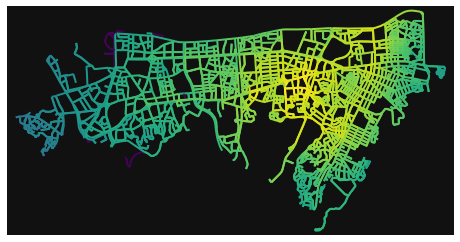

In [3]:
# Choosing Colormaps in Matplotlib
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

# color edges in original graph with closeness centralities from line graph
edge_color = ox.plot.get_edge_colors_by_attr(
    G, 
    "edge_centrality", 
    cmap="viridis", # name of a matplotlib colormap
    start=0, 
    stop=1, 
    na_color='none', 
    equal_size=False
)

# Plot a graph.
fig, ax = ox.plot_graph(G, edge_color=edge_color, edge_linewidth=2, node_size=0)